In [1]:
#εισαγωγή βιβλιοθηκών - πακέτων
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install ppscore

In [3]:
import pandas as pd
import ppscore as pps


In [4]:
df=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [5]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [6]:
df.drop(['Name'],axis=1,inplace=True)

In [7]:
df.drop(['md5'],axis=1,inplace=True)

In [8]:
df.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,332,224,258,9,0,361984,115712,0,6135,4096,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,332,224,3330,9,0,130560,19968,0,81778,4096,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,332,224,3330,9,0,517120,621568,0,350896,4096,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,332,224,258,9,0,585728,369152,0,451258,4096,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,332,224,258,9,0,294912,247296,0,217381,4096,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [9]:
mat=pps.matrix(df)

In [10]:
mat

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Machine,Machine,1.00000,predict_itself,True,None,0.0000,1.000000e+00,None
1,Machine,SizeOfOptionalHeader,0.99521,regression,True,mean absolute error,2.0048,9.603688e-03,DecisionTreeRegressor()
2,Machine,Characteristics,0.00000,regression,True,mean absolute error,4283.2826,5.331614e+03,DecisionTreeRegressor()
3,Machine,MajorLinkerVersion,0.00000,regression,True,mean absolute error,1.7612,1.899711e+00,DecisionTreeRegressor()
4,Machine,MinorLinkerVersion,0.00000,regression,True,mean absolute error,3.8598,6.516602e+00,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
3020,legitimate,ResourcesMinSize,0.00000,regression,True,mean absolute error,830.1086,1.454941e+03,DecisionTreeRegressor()
3021,legitimate,ResourcesMaxSize,0.00000,regression,True,mean absolute error,246876.1302,4.170181e+05,DecisionTreeRegressor()
3022,legitimate,LoadConfigurationSize,0.00000,regression,True,mean absolute error,544498.1538,1.090939e+06,DecisionTreeRegressor()
3023,legitimate,VersionInformationSize,0.00000,regression,True,mean absolute error,4.2926,4.757744e+00,DecisionTreeRegressor()


In [11]:
import seaborn as sns

<Axes: xlabel='x', ylabel='y'>

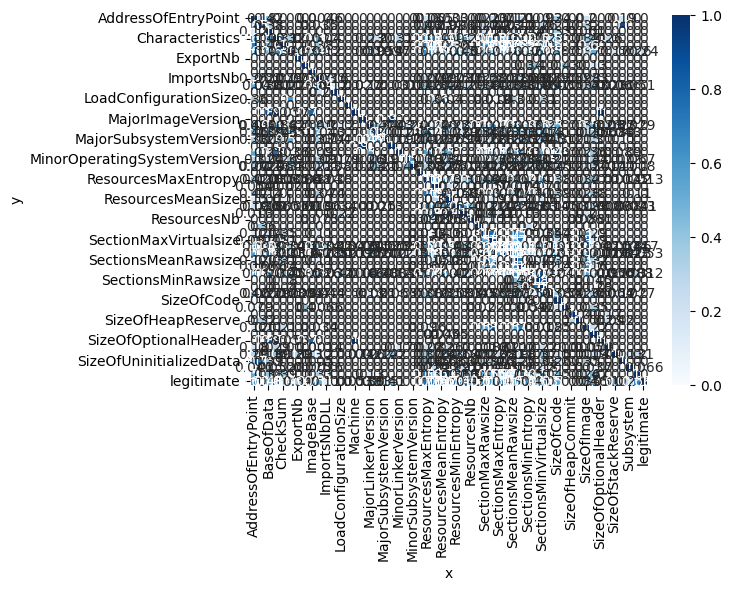

In [12]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)